<a href="https://colab.research.google.com/github/bombermal/Bootcamp_Data_Science_Aplicada_Alura_2020/blob/main/M01_03_Manipula%C3%A7%C3%A3o_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports


In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import seaborn as sns

In [2]:
#data
url = "https://github.com/alura-cursos/agendamento-hospitalar/raw/main/dados/A160324189_28_143_208.csv"
dataRaw = pd.read_csv(url, encoding="latin-1", sep=";", skiprows=3, skipfooter = 12, thousands=".", decimal=",",engine='python')

#Options
pd.options.display.float_format="{:.2f}".format

dataRaw

,Unidade da Federação,1992/Mar,1992/Abr,1993/Mai,1993/Dez,1994/Jan,1994/Fev,1994/Mai,1994/Ago,1994/Nov,1995/Jan,1995/Mar,1995/Jun,1995/Ago,1995/Dez,1996/Fev,1996/Mar,1996/Ago,1996/Dez,1997/Fev,1997/Nov,1998/Fev,1998/Mar,1998/Jul,1998/Ago,1998/Set,1998/Out,1998/Dez,1999/Fev,1999/Mar,1999/Mai,1999/Jul,1999/Ago,1999/Set,1999/Out,1999/Nov,1999/Dez,2000/Jan,2000/Fev,2000/Mar,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
0,11 Rondônia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
1,12 Acre,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,-,420668039.63
2,13 Amazonas,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
3,14 Roraima,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2699213.85,2682746.28,2891100.20,2737677.78,2693726.29,2671451.53,2688315.70,2740952.07,2478349.44,2674958.94,2721261.19,2844811.66,2967161.35,2841587.97,3328230.63,2878691.04,2964324.32,2524712.40,2462451.64,2662240.18,2499996.16,2846135.56,2789823.29,2839389.53,2647540.20,2865777.71,3181321.82,3070436.96,3162342.44,3121104.71,2889969.87,3084561.08,2967159.04,2813954.05,2304961.42,2910776.44,3216466.51,2739498.41,1524478.04,305010883.18
4,15 Pará,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,31808597.47,32133134.42,33770556.65,32979925.38,33665042.35,33475545.29,32067934.67,33615836.09,30623491.62,34121931.00,35039954.20,35424611.06,34160283.18,34484949.49,35618364.04,34380916.90,38441090.50,33583538.08,32789354.87,34513534.80,31885919.67,33236155.79,31008924.95,31064106.50,28543179.30,36713929.36,36462011.47,36790758.67,36974859.69,35555518.00,35222625.80,37009819.17,34635702.52,34749098.46,28714969.96,41248502.78,35396030.78,27618727.51,11559714.54,4437115730.71
5,16 Amapá,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,...,2128578.23,1873120.82,1990850.21,1920807.56,1915176.64,1782927.17,1610779.22,1888216.67,1756846.00,1869746.50,2009211.40,2092229.29,2047927.00,2260210.72,2408659.24,2369223.52,2588154.29,2298458.18,2356798.88,2441325.03,2564176.12,2604263.92,2573615.74,2127851.77,2632890.52,2445874.82,2173060.89,2541342.33,2540183.86,2239443.36,2141400.83,2349858.56,2342499.95,2286241.46,1774558.12,2701014.87,2699492.23,2155083.37,8341

In [3]:
#Subistituindo '-' por 0 e convertendo coluna de string para float
data = dataRaw.set_index("Unidade da Federação")
#Substituindo os campos vazios '-' por 0
data = data.replace(to_replace="-", value=0).astype(float)

#Escolhendo os dados a partir de 2008 de Fevereiro
data = data.loc[:,"2008/Fev":"Total"]
data.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Jun,2017/Jul,2017/Ago,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,...,8041248.80,8199032.67,8363386.07,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,3355223.35,3562691.54,3375296.64,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,420668039.63
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,...,13718828.46,14396210.86,13745304.22,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,..

- [ ] Desafio 01: Escolher uma palete de cores mais adequada do matplotlib.
- [X] Desafio 02: Adicionar uma coluna mostrando a região (Norte, Nodeste, Sul, Suldeste e Centro-Oeste) de cada estado.
- [X] Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)
- [X] Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente


In [4]:
#Desafio 2
#Separar estados por região, criando uma coluna para o nome do estado e uma com o número da região
tempDf = dataRaw["Unidade da Federação"].str.split('(\d)', expand=True)
data["Num Região"] = tempDf[1].tolist()
data["Num Região"] = data["Num Região"].astype(float)
data["Estado"] = tempDf[4].tolist()

#Subistitui os números das regiões por nomes
def numToStateName(val):
  return {
      1 : "Norte",
      2 : "Nordeste",
      3 : "Sudeste",
      4 : "Sul",
      5 : "Centro-Oeste"
  }[val]

#Resultado da criação da coluna com as regiões
data["Região"] = data["Num Região"].apply(numToStateName)
data.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Set,2017/Out,2017/Nov,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,Total,Num Região,Estado,Região
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,4384430.09,4173529.95,4293085.61,4674947.02,5087527.81,4724192.54,...,7889819.50,8603943.85,8048398.25,8159737.49,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8326416.32,8413784.42,7174312.31,7423678.64,8581195.13,9193593.76,7407388.24,3556381.57,929129659.72,1.00,Rondônia,Norte
12 Acre,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,2500589.76,2749521.65,2473515.82,2801446.23,2672803.31,3135521.30,...,3341497.58,3358378.05,3145385.44,2638773.92,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3261123.88,2981264.22,2859102.06,2472063.08,2383895.48,2199920.70,1163813.08,0.00,420668039.63,1.00,Acre,Norte
13 Amazonas,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,9335803.05,9800511.52,9461664.54,10954545.77,10529645.04,10105494.01,...,13979792.94,13895515.90,13518116.80,13635186.02,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15346323.27,16282436.68,14781332.42,14923380.22,15939561.23,15138110.70,14773739.41,16330913.81,19441150.53,17509334.66,13358514.02,4726485.73,1771654871.23,1.00,Amazonas,Norte
14 Roraima,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,1485166.60,1604886.45,1220176.72,1276120.86,1379942.19,1679122.67,...,2737677.78,2693726.29,2671451.53,2688315.70,27

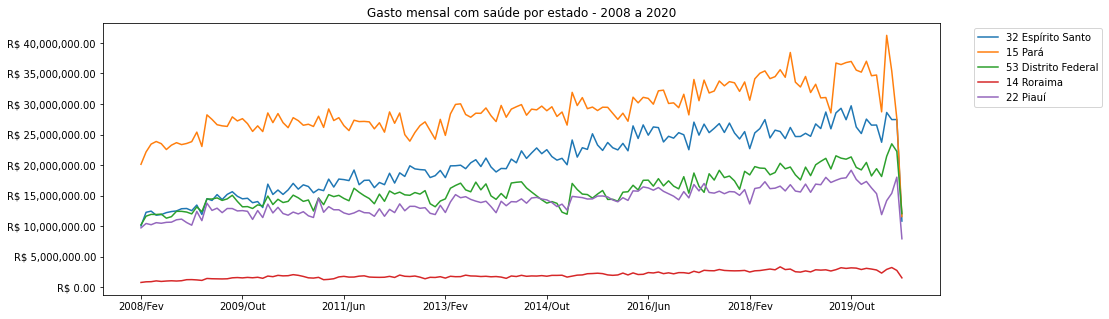

In [5]:
# Desafio 03: Formatar o gráfico de custos por mês dos 5 estados, deixando ele agradável (Bonitão, segundo o Gui)

#Sample de gráficos
ax = data.loc[:,"2008/Fev":"2020/Ago"].sample(5).T.plot(kind="line", figsize=(15,5))

#Configuração do eixo Y
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("R$ {x:,.2f}"))
#Legenda
plt.legend(bbox_to_anchor=(1.2,1), loc="upper right")
#Título
plt.title("Gasto mensal com saúde por estado - 2008 a 2020")
plt.show()

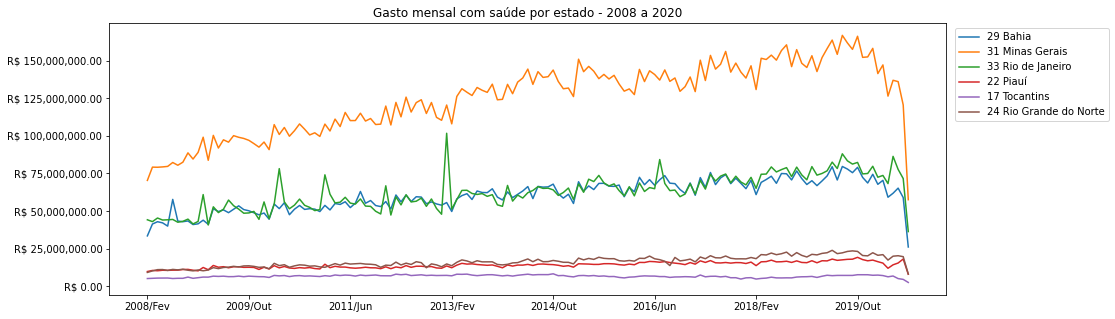

In [76]:
# Desafio 04: Adicione o seu estado aos 5 estados plotados anteriormente

#Remove o RN da lista de estados
listaEstados = data.index.tolist()
listaEstados.remove('24 Rio Grande do Norte')

#Seleciona dados sem RN
tempDf = data.loc[listaEstados,"2008/Fev":"2020/Ago"].sample(5)
tempDf.loc['24 Rio Grande do Norte'] = data.loc['24 Rio Grande do Norte', "2008/Fev":"2020/Ago"]

#Plot
ax = tempDf.T.plot(kind="line", figsize=(15,5))
#Configuração do eixo Y
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("R$ {x:,.2f}"))
#Legenda
plt.legend(bbox_to_anchor=(1.2,1), loc="upper right")
#Título
plt.title("Gasto mensal com saúde por estado - 2008 a 2020")
plt.show()

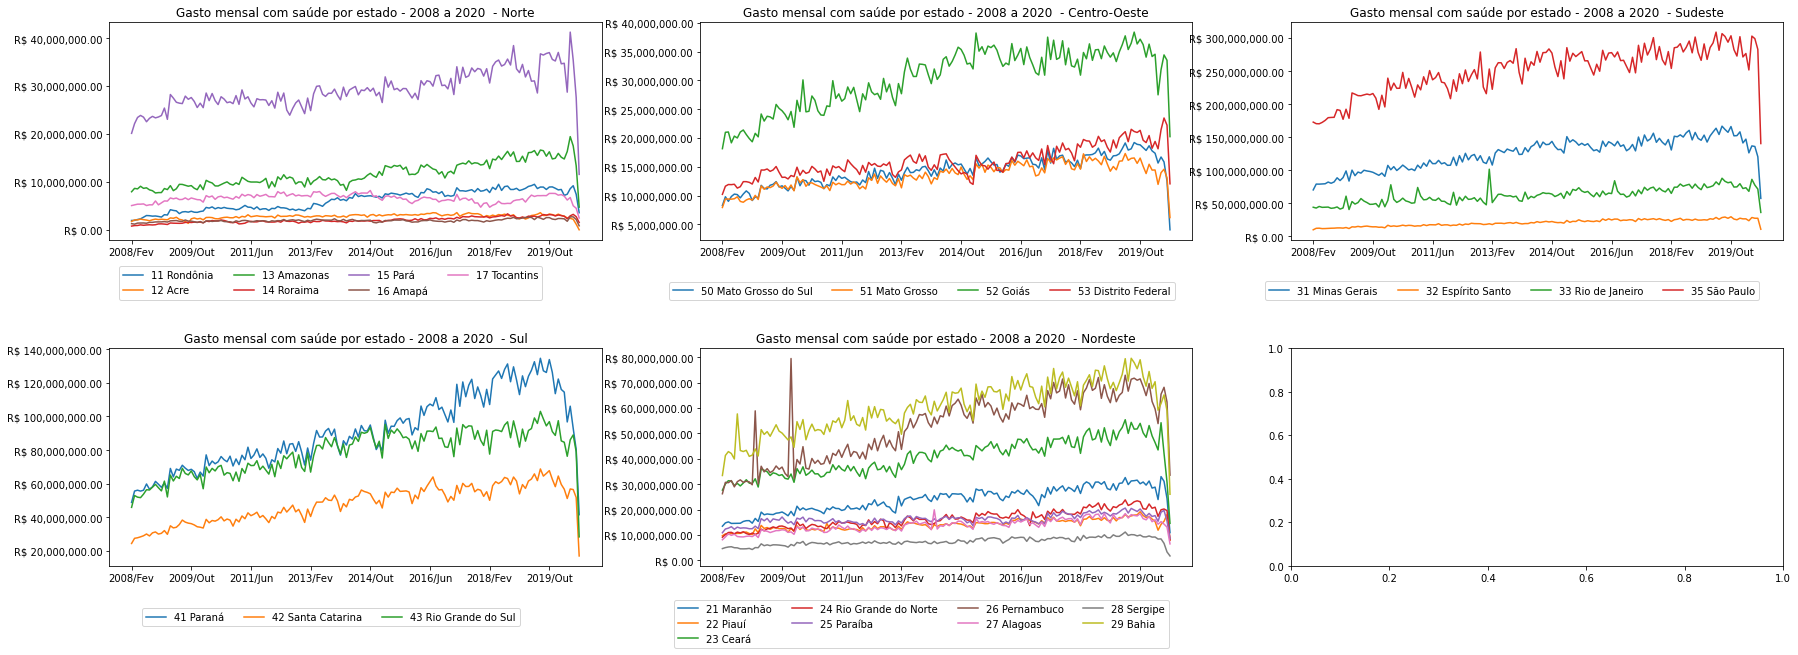

In [80]:
regions = data["Região"].unique().tolist()

fig, axis = plt.subplots(ncols=3, nrows=2, figsize=(30,10))
#Espaço entre gráficos "horizontal"
plt.subplots_adjust(hspace = .5)

positions = [(.45,-.30), (.45,-.40), (.45,-.30), (.45,-.30), (.45,-.30)]

row = 0
for col, ii in enumerate(regions):
  mask = data["Região"] == ii
  data[mask].T[:-4].plot(kind="line", ax=axis[row%2,col%3])
  #Legenda
  axis[row%2,col%3].set_title("Gasto mensal com saúde por estado - 2008 a 2020 "+" - "+ii)
  axis[row%2,col%3].legend(ncol=4, bbox_to_anchor=positions[col], loc="lower center")
  axis[row%2,col%3].yaxis.set_major_formatter(tck.StrMethodFormatter("R$ {x:,.2f}"))
  row += 1

- [ ] Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue
- [X] Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região
- [X] Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

In [95]:
# Desafio 05: Buscar os casos de dengue no Brasil (época de maior número de casos e regiões mais atingidas) e se os picos de alguns estados em fevereiro e verão de modo geral, pode ser reflexos dos casos de dengue



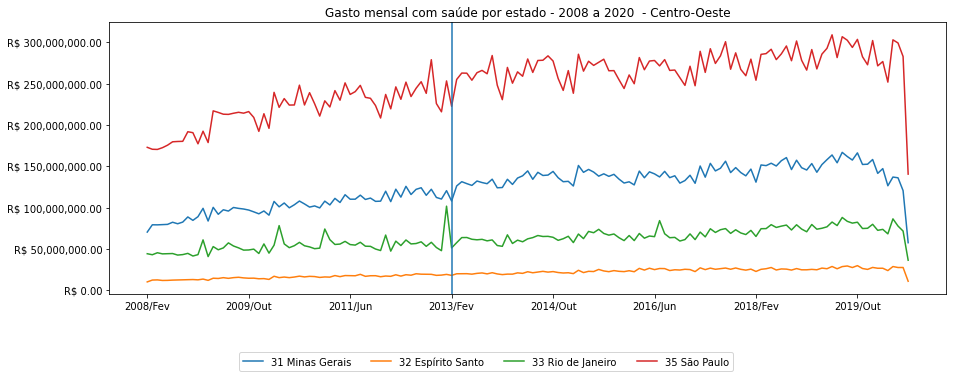

In [93]:
# Desafio 06: Plotar o gráfico dos custos apenas dos estados da região sudeste e verificar se os picos de 2013/Fev teve comportamento similar em todos os demais estados da região

mask = data["Região"] == "Sudeste"
ax = data[mask].T[:-4].plot(kind="line", figsize=(15,5))
#Legenda
ax.set_title("Gasto mensal com saúde por estado - 2008 a 2020 - Sudeste")
ax.legend(ncol=4, bbox_to_anchor=positions[col], loc="lower center")
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("R$ {x:,.2f}"))
ax.axvline(x=60)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


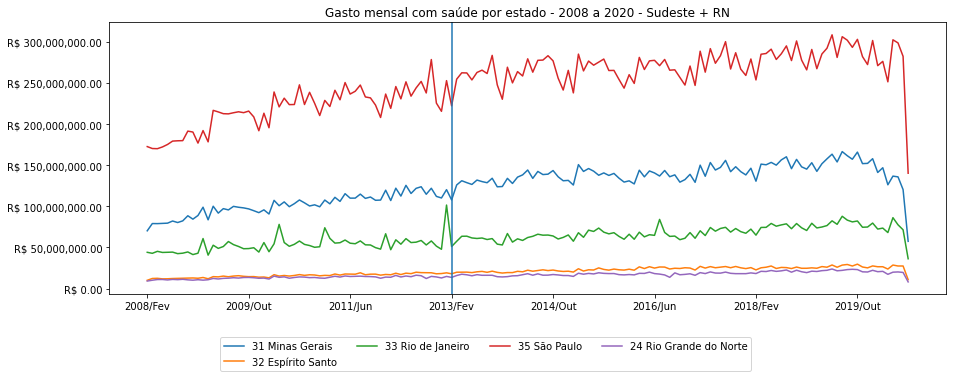

In [100]:
# Desafio 07: Adicionar seu estado escolhido novamente, deixe o gráfico informativo e tire conclusões sobre seus estados comparando com os demais. Tire suas conclusões e compartilhe com a gente.

mask = data["Região"] == "Sudeste"
tempDf = data[mask]
tempDf.loc['24 Rio Grande do Norte'] = data.loc['24 Rio Grande do Norte', "2008/Fev":"2020/Ago"]

ax = tempDf.T[:-4].plot(kind="line", figsize=(15,5))
#Legenda
ax.set_title("Gasto mensal com saúde por estado - 2008 a 2020 - Sudeste + RN")
ax.legend(ncol=4, bbox_to_anchor=positions[col], loc="lower center")
ax.yaxis.set_major_formatter(tck.StrMethodFormatter("R$ {x:,.2f}"))
ax.axvline(x=60)
plt.show()
